Assignment 1B 
Camille Porter, Katalin Ferenc, Sarah Alkhateeb

### Task 1: Working with a dataset with categorical features

#### Step 1. Reading the data

In [1]:
#read the files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_tra = pd.read_csv('adult_train.csv')
df_tes = pd.read_csv('adult_test.csv')

In [2]:
df_tr = df_tra.sample(frac=1.0, random_state=0)
df_ts = df_tes.sample(frac=1.0, random_state=0)

In [48]:
df_tr.shape

(32561, 15)

In [49]:
df_ts.shape

(16281, 15)

In [3]:
df_tr.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
22278,49,Local-gov,110172,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
8950,49,Private,105431,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Female,0,0,40,United-States,<=50K
7838,31,Private,34374,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
16505,53,Private,191025,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,43,United-States,<=50K
19140,30,Private,108247,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K


In [4]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 22278 to 2732
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [61]:
X = df_tr.drop(['target', 'fnlwgt'], axis=1)


Y = df_tr['target']

In [62]:
Xt = df_ts.drop(['target', 'fnlwgt'], axis=1)


Yt = df_ts['target']

In [90]:
# replace 99999 in capital_gain column to 0

X["capital-gain"].replace({99999 : 0}, inplace=True)
Xt["capital-gain"].replace({99999 : 0}, inplace=True)

In [91]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
22278,49,Local-gov,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
8950,49,Private,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Female,0,0,40,United-States
7838,31,Private,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
16505,53,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,43,United-States
19140,30,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


In [92]:
X['capital-gain'].unique()

array([    0,  3674, 15024,  7688,  7298,  2329, 10520,   594,  3103,
        1151, 13550,  2346,  2961,   991,  1086,  4386,  3411,  2202,
        2829,  2407,  3137,  4865,  3464,  1055,  1409,  3887,  4650,
        2635,  4416,  3325,  2290, 14344,  6849,  3942,  2463,  2597,
       20051,  6418, 14084,  7430,  6497,  2176,  3908,  4787,  3418,
       25236,  9562, 18481,  5178,  2580,  5013,  2964,  4064, 25124,
        1506,  8614,  2907,  4508,  6767, 15020,  6723, 27828,  2354,
        2009,  2036,  4101,  5721,  2977,  2050,  1797, 34095,  1471,
        4687,  3432,  3471,  2174,  1831, 10605,   914,  3781,  2414,
        6514,  2885,  9386,  5455,  7443,   114,  3456,  4934,  2105,
        3818,  1848,  1173,  2387,   401, 15831,  5556,  2653,  2936,
        2228,  1455, 11678, 10566,  2993,  7978,  1424,  3273,  1639,
        6360,  2062,  5060,  6097,  4931,  7896,  2538,  1111, 41310,
       22040])

In [93]:
Y.head()

22278    <=50K
8950     <=50K
7838     <=50K
16505    <=50K
19140     >50K
Name: target, dtype: object

#### Step 2: Encoding the features as numbers

In [94]:
# convert a DataFrame into a list of dictionaries

dict_X = X.to_dict('records') # convert the training set
dict_Xt = Xt.to_dict('records') # convert the test set
#dict_X

In [95]:
# make a DictVectorizer on the training set
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
X_train_encoded = dv.fit_transform(dict_X)

In [96]:
# a cross-validation accuracy for the training set using Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier()
cross_val_score(clf, X_train_encoded, Y, cv=5).mean()

0.8632106699471969

In [97]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(n_estimators=100)
cross_val_score(clf1, X_train_encoded, Y, cv=5).mean()

0.844814255442998

In [98]:
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(max_depth=5)
cross_val_score(clf2, X_train_encoded, Y, cv=5).mean()

0.8463806605273672

In [99]:
# make a DictVectorizer on the test set

X_test_encoded = dv.transform(dict_Xt)

#### Step 3. Combining the steps

In [100]:
# build a pipeline consisting of a vectorization step and then a Gradient Boosting Classifier, 
from sklearn.pipeline import make_pipeline
  
pipeline = make_pipeline(
  DictVectorizer(),
  GradientBoostingClassifier()
)

pipeline.fit(dict_X, Y);

In [101]:
# make a prediction on test data

prediction = pipeline.predict(dict_Xt)
prediction

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [102]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Yt , prediction)
acc

0.8688041275105952

### Task 2: Decision trees and random forests

#### Underfitting and overfitting in decision tree classifiers

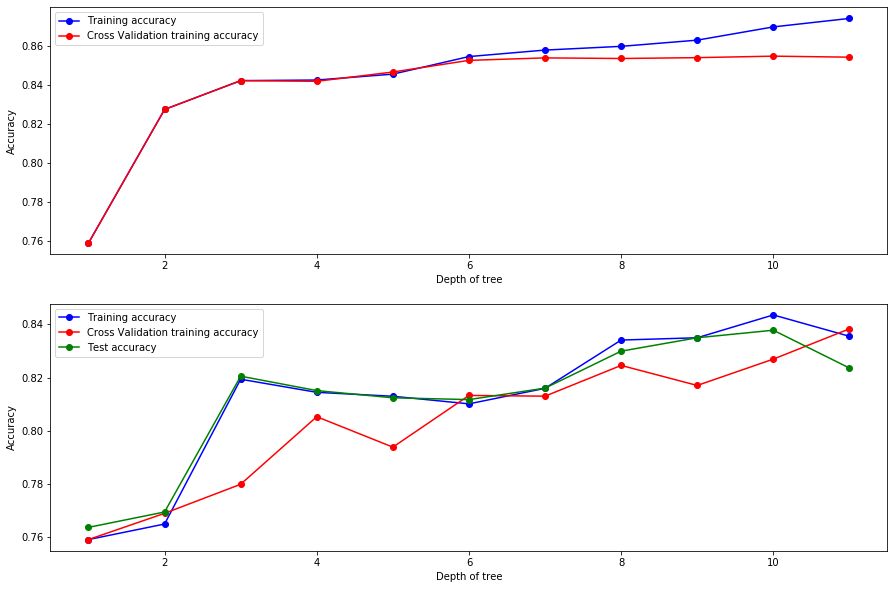

In [103]:
#sets the maximum depth for tree classifier (Decision Tree Classifier)

# List of values to try for max_depth:
plt.figure(figsize=(15,10))
plt.subplot(211)
max_depth_range = list(range(1, 12))
# 
accuracy = []
accuracy2 = []
for d in max_depth_range:
    cl = DecisionTreeClassifier(max_depth = d)
    cl.fit(X_train_encoded, Y)
    score = cl.score(X_train_encoded, Y)
    accuracy.append(score)
    score2 = cross_val_score(cl, X_train_encoded, Y, cv=5).mean()
    accuracy2.append(score2)
    
plt.plot(max_depth_range, accuracy,'bo-', label = 'Training accuracy')
plt.plot(max_depth, accuracy2, 'ro-', label = 'Cross Validation training accuracy')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(212)
max_depth = list(range(1, 12))
# 
acc = []
accuracy2 = []
accuracy3 = []
for d in max_depth:
    cls = RandomForestClassifier(max_depth = d, n_estimators = 1, n_jobs=-1) #n_job = -1 all CPU corecores will be used
    cls.fit(X_train_encoded, Y)
    score = cls.score(X_train_encoded, Y)
    acc.append(score)
    score2 = cross_val_score(cls, X_train_encoded, Y, cv=5).mean()
    accuracy2.append(score2)
    pred = cls.predict(X_test_encoded)
    score3 = accuracy_score(Yt, pred)
    accuracy3.append(score3)
    
plt.plot(max_depth, acc,'bo-', label = 'Training accuracy')
plt.plot(max_depth, accuracy2, 'ro-', label = 'Cross Validation training accuracy')
plt.plot(max_depth, accuracy3, 'go-', label = 'Test accuracy')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend();

We see that as the max allowed tree depth increases the accuracy increases. It means the classifier learns more (from) the dataset as we allow it to create more pure leaves. There is a risk of overfitting because the deeper the tree is the more the classifier learns the noise. We want to keep our classifier applicable for new data, so we aim to choose a tree depth that is just enough to capture the main trends but not too much to capture noise too.

#### Underfitting and overfitting in random forest classifiers

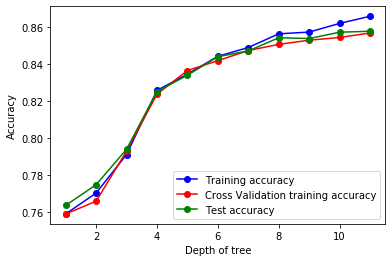

In [104]:
#sets the maximum depth for tree classifier (Random Forest Classifier)

# List of values to try for max_depth:
max_depth = list(range(1, 12))
# 
acc = []
accuracy2 = []
accuracy3 = []
for d in max_depth:
    cls = RandomForestClassifier(max_depth = d, n_estimators = 100, n_jobs=-1) #n_job = -1 all CPU corecores will be used
    cls.fit(X_train_encoded, Y)
    score = cls.score(X_train_encoded, Y)
    acc.append(score)
    score2 = cross_val_score(cls, X_train_encoded, Y, cv=5).mean()
    accuracy2.append(score2)
    pred = cls.predict(X_test_encoded)
    score3 = accuracy_score(Yt, pred)
    accuracy3.append(score3)
    
plt.plot(max_depth, acc,'bo-', label = 'Training accuracy')
plt.plot(max_depth, accuracy2, 'ro-', label = 'Cross Validation training accuracy')
plt.plot(max_depth, accuracy3, 'go-', label = 'Test accuracy')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

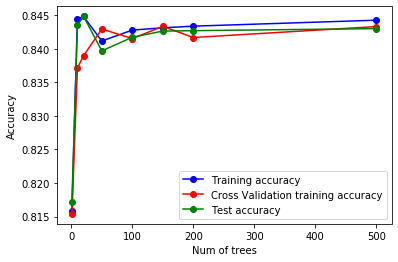

In [106]:
num_tree = [1, 10, 20, 50, 100, 150, 200, 500]
# 
acc2 = []
acc3 = []
acc4 = []
for tr in num_tree:
    cls = RandomForestClassifier(max_depth = 6, n_estimators = tr, n_jobs=-1) #n_job = -1 all CPU corecores will be used
    cls.fit(X_train_encoded, Y)
    score = cls.score(X_train_encoded, Y)
    acc2.append(score)
    score2 = cross_val_score(cls, X_train_encoded, Y, cv=5).mean()
    acc3.append(score2)
    pred = cls.predict(X_test_encoded)
    score3 = accuracy_score(pred, Yt)
    acc4.append(score3)
    
plt.plot(num_tree, acc2,'bo-', label = 'Training accuracy')
plt.plot(num_tree, acc3, 'ro-', label = 'Cross Validation training accuracy')
plt.plot(num_tree, acc4, 'go-', label = 'Test accuracy')
plt.xlabel('Num of trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

- What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?

We calculated the training accuracy score and the cross validation accuracy of decision tree and random forest with different max tree depth as well as random forest with increasing number of trees.
We saw that the decision tree classifier performs better than the random forest with only one tree. Random forest has two random processes that enhance its performance when there are many trees in the forest, but hinders it when we choose a small tree number. These two processes are random choice of features and random selection from the data. As the tree number increases the randomness helps us discovering the main trend, but in small tree number it is just very noisy. When ensemble size is 1, the tree is randomly selected, and having a deeper tree is not necessarily better. 

- What happens with the curve for random forests as the ensemble size grows?

The curve is smoother. Ensemble size of 1 is a random curve, but as ensemble size grows, there is a steady increase in accuracy. 

- What happens with the best observed test set accuracy as the ensemble size grows?

The accuracy of both training and cross validation increase up until about 100 tree in the forest, then the cross validation accuracy stays about constant, while the training accuracy keeps increasing a bit, but not much. We can assume that the ensemble of 100 trees can learn from the data as much as possible and adding more trees does not increase performance. We also note that the learning time increases with increasing number of trees. So it is a good idea to chose the smallest number of trees that provides high enough test accuracy.

- What happens with the training time as the ensemble size grows?

It gets longer. 

In [107]:
#try different values for n_estimator (number of trees)

num_to_test = {'n_estimators': [1, 50, 100, 200]}
# Use out-of-bag samples to estimate the generalization accuracy
rf = RandomForestClassifier(oob_score=True, random_state=0)

In [79]:
# n-fold cross validation
from sklearn.model_selection import GridSearchCV

# 10-fold cross validation, return training score
grid10 = GridSearchCV(rf, param_grid = num_to_test, cv = 10, scoring ='accuracy', n_jobs=2, return_train_score = True)

# Do the training
grid10.fit(X_train_encoded,Y)
grid10.cv_results_

{'mean_fit_time': array([ 0.26262412, 10.67555954, 21.41707582, 44.38784099]),
 'std_fit_time': array([0.00485467, 0.04900337, 0.15941072, 0.83795887]),
 'mean_score_time': array([0.00579021, 0.05057333, 0.0974678 , 0.19779303]),
 'std_score_time': array([7.52448016e-05, 4.05907326e-04, 2.51764062e-03, 7.88713377e-03]),
 'param_n_estimators': masked_array(data=[1, 50, 100, 200],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 200}],
 'split0_test_score': array([0.81209702, 0.8544673 , 0.85477433, 0.85723058]),
 'split1_test_score': array([0.80436118, 0.84152334, 0.84520885, 0.84490172]),
 'split2_test_score': array([0.80651106, 0.84766585, 0.84643735, 0.84459459]),
 'split3_test_score': array([0.80743243, 0.83968059, 0.83875921, 0.83845209]),
 'split4_test_score': array([0.80866093, 0.8495086 , 0.85042998, 0.85227273]),
 'split5_test_

In [36]:
# Find the best model and the score from the cross validation experiment

print('The best model:', grid10.best_estimator_)
print('The best score: ', grid10.best_score_)

The best model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)
The best score:  0.8549491723227174


### Task 3: Feature importances in random forest classifiers

In [108]:
#feature importance 
clf1.fit(X_train_encoded, Y)
importances = clf1.feature_importances_
names = dv.get_feature_names()

std = np.std([tree.feature_importances_ for tree in clf1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_encoded.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature age (0.229557)
2. feature hours-per-week (0.116024)
3. feature capital-gain (0.097942)
4. feature marital-status=Married-civ-spouse (0.076270)
5. feature education-num (0.066855)
6. feature relationship=Husband (0.043689)
7. feature capital-loss (0.034306)
8. feature marital-status=Never-married (0.023318)
9. feature occupation=Exec-managerial (0.020291)
10. feature occupation=Prof-specialty (0.016394)
11. feature education=Bachelors (0.014132)
12. feature workclass=Private (0.011468)
13. feature relationship=Not-in-family (0.011392)
14. feature relationship=Wife (0.009715)
15. feature workclass=Self-emp-not-inc (0.009510)
16. feature relationship=Own-child (0.009396)
17. feature sex=Female (0.009339)
18. feature education=Masters (0.007963)
19. feature education=HS-grad (0.007628)
20. feature occupation=Other-service (0.007620)
21. feature sex=Male (0.007573)
22. feature race=White (0.007271)
23. feature occupation=Sales (0.007213)
24. feature workclass=Sel

The most important feature was final weight, which doesn't mean anything for our dataset, so we deleted it and ran it again. The 10 next most important are: 
age: more experience pays more, and older people have more experience  
hours per week: How many hours you work per week - full time jobs pay more  
capital gain: money made from passive investment, like real estate or stock market investments. We think this is the money made in 1 year. In order to have extra money to invest, a person needs to have a high income, so it makes sense that it is predictor of income.   
married-civ-spouse: We think it's people who were married civally, not religiously.  
education number: more education pays more  
husband: married men earn more  
capital-loss: people with money to invest are rich, even if they lost money last year  
never-married: don't know why this is so important  
manager: bosses earn more
professor: professors earn a lot

at the end, we see that being from different countries does not matter very much for your salary

Right now we can see how important a feature is, but we can't see if it's a positive or negative change. 

#### For your report, please also mention an alternative way to compute some sort of importance score of individual features. 

Mean decrease in impurity doesn't count for different levels in different variables which means that the importance score for variables with more levels will be inflated compared to others and that is why this method is not very reliable when we have data with different variables with different levels.
A better way to calculate the importance score for features is using premutaion importance.

Premutation importance: After training our training data we choose one of the columns and rearrange the values in this column (randomly assigning the data to the wrong row), 
before testing the model on the test data using the permuted data, we then calculate the base accuracy (classification) or Rsquared (regression) to compare with after prediction. Without retraining the data again we predict the outcomes using permuted test data and calculate the accuracy/Rsquared and compare with the base one. If the variance/error increased after premutation then the feature (column we permuted) is important and if the variance/error does not change much, it means that the feature does not affect the outcome and might not very usefull for prediction. We repeat this for each column to see the importance for each feature.

But we should also be aware of the correlation between variables becuase in case of two correlated variables (features) we might have a false importance score and end up not using a feature that really important and has a strong effect on the output.